Test Code that takes in a pair of color+depth images and create a single pointcloud using open3d

In [27]:
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np


In [28]:
color_raw = o3d.io.read_image("color.jpg")
depth_raw = o3d.io.read_image("depth.png")
print(depth_raw)
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
color_raw, depth_raw)

Image of size 256x256, with 1 channels.
Use numpy.asarray to access buffer data.


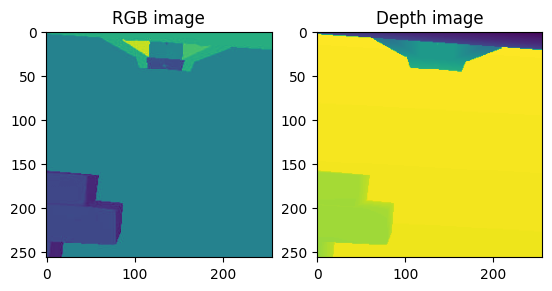

[[0.835 0.835 0.835 ... 0.808 0.808 0.807]
 [0.837 0.837 0.837 ... 0.809 0.809 0.809]
 [0.84  0.84  0.839 ... 0.81  0.81  0.81 ]
 ...
 [0.944 0.944 0.944 ... 0.964 0.964 0.964]
 [0.944 0.944 0.944 ... 0.964 0.964 0.964]
 [0.944 0.944 0.944 ... 0.964 0.964 0.964]]


In [29]:
plt.subplot(1, 2, 1)
plt.title('RGB image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image.depth)
plt.show()
print(np.asarray(rgbd_image.depth))

In [30]:
width, height = 264, 264
intrinsic_matrix = np.array([[952.828,     0.,     646.699 ],[0.,      952.828,     342.637 ], [0.,         0.,         1.  ]]) 
pinholeCamera = o3d.camera.PinholeCameraIntrinsic(width, height, intrinsic_matrix[0][0], intrinsic_matrix[1][1], intrinsic_matrix[0][2], intrinsic_matrix[1][2])
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
            rgbd_image,
            pinholeCamera)
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])